In [ ]:
import imageio as iio
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
vol_ct = iio.volread('/content/drive/MyDrive/ct_anon', 'DICOM')

Reading DICOM (examining files): 1/165 files (0.6%)3/165 files (1.8%)4/165 files (2.4%)30/165 files (18.2%)53/165 files (32.1%)71/165 files (43.0%)94/165 files (57.0%)119/165 files (72.1%)140/165 files (84.8%)162/165 files (98.2%)165/165 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 2/165  (1.2%)5/165  (3.0%)21/165  (12.7%)37/165  (22.4%)45/165  (27.3%)60/165  (36.4%)74/165  (44.8%)88/165  (53.3%)104/165  (63.0%)116/165  (70.3%)129/165  (78.2%)143/165  (86.7%)157/165  (95.2%)165/165  (100.0%)


In [ ]:
print(vol_ct.meta)

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2.1'), ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'), ('SOPInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5438.5601.121559333988261106705575235883'), ('StudyDate', '20160615'), ('ContentDate', '20160615'), ('StudyTime', '124310.000'), ('ContentTime', '124554.424'), ('Modality', 'CT'), ('Manufacturer', 'TOSHIBA'), ('StudyDescription', 'CT ABD & PELVIS W/CONTRAST'), ('SeriesDescription', 'LUNG Lung 2.0 CE  LUNG AIDR 3D STD'), ('PatientName', 'AP-6H6G'), ('PatientID', 'AP-6H6G'), ('PatientBirthDate', ''), ('PatientSex', 'M '), ('StudyInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5438.5601.179649514971604872958670814403'), ('SeriesInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5438.5601.261006738389878998601352334375'), ('SeriesNumber', 3), ('AcquisitionNumber', 3), ('InstanceNumber', 1), ('PatientOrientation', 'L\\P '), ('ImagePositionPatient', (-243.6637, -243.6637, 2065.0)), ('ImageOrientationPatient', (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)), ('SamplesPerPixel', 1), ('Rows'

In [ ]:
print(vol_ct.meta['Modality'])
print(vol_ct.shape)

CT
(165, 512, 512)


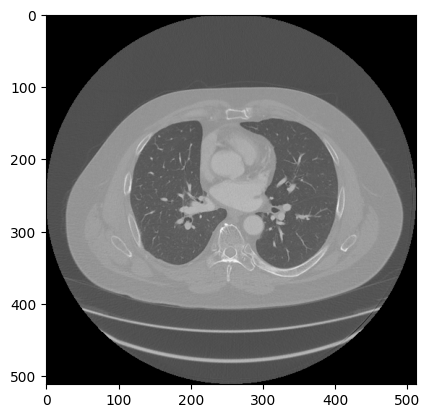

In [ ]:
plt.imshow(vol_ct[69], cmap='gray')
plt.show()

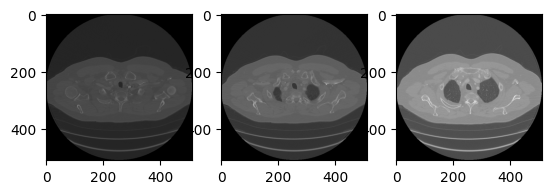

In [ ]:
fig,axes = plt.subplots(1,3)
axes[0].imshow(vol_ct[5], cmap='gray')
axes[1].imshow(vol_ct[10], cmap='gray')
axes[2].imshow(vol_ct[15], cmap='gray')

In [ ]:
n0, n1, n2 = vol_ct.meta['shape']
d0, d1, d2 = vol_ct.meta['sampling']

ax_asp = d1/d2
sag_asp = d0/d1
cor_asp = d0/d2

In [ ]:
def dicom_axial_animation(x):
  plt.figure(1)
  plt.imshow(vol_ct[x, : , :], cmap='gray', aspect=ax_asp)
  plt.axis('off')
  plt.show()
  return x

interact(dicom_axial_animation, x=(0, vol_ct.shape[0]-1))

interactive(children=(IntSlider(value=82, description='x', max=164), Output()), _dom_classes=('widget-interact…

<function __main__.dicom_axial_animation(x)>

In [ ]:
def dicom_coronal_animation(y):
  plt.figure(2)
  plt.imshow(vol_ct[:, y, :], cmap='gray', aspect=cor_asp)
  plt.axis('off')
  plt.show()
  return y

interact(dicom_coronal_animation, y=(0, vol_ct.shape[1]-1))

interactive(children=(IntSlider(value=255, description='y', max=511), Output()), _dom_classes=('widget-interac…

<function __main__.dicom_coronal_animation(y)>

In [ ]:
def dicom_sagittal_animation(z):
  plt.figure(3)
  plt.imshow(vol_ct[:, : , z], cmap='gray', aspect=sag_asp)
  plt.axis('off')
  plt.show()
  return z

interact(dicom_sagittal_animation, z=(0, vol_ct.shape[2]-1))

interactive(children=(IntSlider(value=255, description='z', max=511), Output()), _dom_classes=('widget-interac…

<function __main__.dicom_sagittal_animation(z)>

In [ ]:
print(f'axial aspect ratio: {ax_asp}' + f' = {d1} \\ {d2}')
print(f'coronal aspect ratio: {cor_asp}'+ f' = {d0} \\ {d1}')
print(f'sagittal aspect ratio: {sag_asp}'+ f' = {d0} \\ {d2}')

axial aspect ratio: 1.0 = 0.953 \ 0.953
coronal aspect ratio: 2.0986358866736623 = 2.0 \ 0.953
sagittal aspect ratio: 2.0986358866736623 = 2.0 \ 0.953


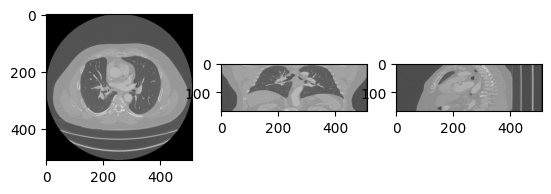

In [ ]:
fig,axes = plt.subplots(1,3)
axes[0].imshow(vol_ct[65,:,:], cmap='gray')
axes[1].imshow(vol_ct[ :, 274, : ], cmap='gray')
axes[2].imshow(vol_ct[:,:,274], cmap='gray')

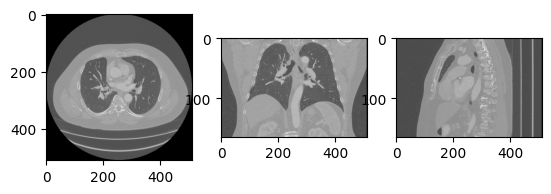

In [ ]:
fig,axes = plt.subplots(1,3)
axes[0].imshow(vol_ct[65,:,:], cmap='gray', aspect=ax_asp)
axes[1].imshow(vol_ct[ :, 274, : ], cmap='gray', aspect=cor_asp)
axes[2].imshow(vol_ct[:,:,274], cmap='gray', aspect=sag_asp)

In [ ]:
shape = vol_ct.meta['shape']
sampling = vol_ct.meta['sampling']
resolution = [shape[i] * sampling[i] for i in range(len(shape))]

print("Shape:", shape)
print("Sampling size:", sampling)
print("Spatial Resolution in mm:", resolution)

Shape: (165, 512, 512)
Sampling size: (2.0, 0.953, 0.953)
Spatial Resolution in mm: [330.0, 487.936, 487.936]


In [ ]:
vol_mri = iio.volread('/content/drive/MyDrive/mri_anon', 'DICOM')

Reading DICOM (examining files): 1/120 files (0.8%)2/120 files (1.7%)3/120 files (2.5%)23/120 files (19.2%)42/120 files (35.0%)61/120 files (50.8%)80/120 files (66.7%)97/120 files (80.8%)117/120 files (97.5%)120/120 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 12/120  (10.0%)25/120  (20.8%)38/120  (31.7%)49/120  (40.8%)62/120  (51.7%)76/120  (63.3%)87/120  (72.5%)99/120  (82.5%)111/120  (92.5%)120/120  (100.0%)


In [ ]:
print('Modality: ' + vol_mri.meta['Modality'])

shape_mri = vol_mri.meta['shape']
sampling_mri = vol_mri.meta['sampling']
resolution_mri = [shape_mri[i] * sampling_mri[i] for i in range(len(shape_mri))]

print("Shape:", shape_mri)
print("Sampling size:", sampling_mri)
print("Spatial Resolution in mm:", resolution_mri)

Modality: MR
Shape: (120, 512, 512)
Sampling size: (1.500001680672269, 0.7031, 0.7031)
Spatial Resolution in mm: [180.00020168067226, 359.9872, 359.9872]


In [ ]:
from skimage import morphology
from scipy.ndimage import label
from skimage.measure import regionprops

ct_image = vol_ct

segmented_lungs = np.zeros_like(ct_image, dtype=np.uint8)

# Thresholding parameters
min_intensity = -200  # Minimum pixel intensity
max_intensity = -1  # Maximum pixel intensity

# Iterate through slices
for i in range(ct_image.shape[0]):
    slice_data = ct_image[i, :, :]

    # Step 1: Thresholding
    lung_mask = (slice_data > min_intensity) & (slice_data < max_intensity)

    # Step 2: Morphological Cleanup
    lung_mask = morphology.binary_closing(lung_mask, morphology.disk(3))
    lung_mask = morphology.remove_small_objects(lung_mask, min_size=500)

    # Step 3: Connected Region Labelling
    labeled_lungs, num_labels = label(lung_mask)

    if num_labels > 0:
        # Find the largest connected region
        regions = regionprops(labeled_lungs)
        largest_region = max(regions, key=lambda r: r.area)
        largest_label = largest_region.label

        # Create a mask for the largest connected region
        largest_mask = (labeled_lungs == largest_label)
        segmented_lungs[i, :,:] = largest_mask.astype(np.uint8)

In [ ]:
def dicom_axial_animation_ct(x):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.imshow(vol_ct[x, : , :], cmap='gray', aspect=ax_asp)
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(segmented_lungs[x, : , :], cmap='gray', aspect=ax_asp)
  plt.axis('off')
  plt.show()
  return x

interact(dicom_axial_animation_ct, x=(0, ct_image.shape[0]-1))

interactive(children=(IntSlider(value=82, description='x', max=164), Output()), _dom_classes=('widget-interact…

<function __main__.dicom_axial_animation_ct(x)>

In [ ]:
from skimage import morphology, filters, measure
import numpy as np

ct_image = vol_ct
segmented_lungs = np.zeros_like(ct_image, dtype=np.uint8)

body_hu_range = (-800, -150)
lung_hu_range = (-950, -500)
adaptive_size_factor = 0.005

for i in range(ct_image.shape[0]):
    slice_data = ct_image[i]

    # 1. Precision Body Segmentation ------------------------------------------
    # Step 1a: Initial body detection
    body_mask = (slice_data > body_hu_range[0]) & (slice_data < body_hu_range[1])

    # Step 1b: Morphological refinement
    body_mask = morphology.binary_closing(body_mask, morphology.disk(7))
    body_mask = morphology.remove_small_holes(body_mask, area_threshold=10000)

    # 2. Smart Exterior Exclusion ---------------------------------------------
    # Step 2a: Calculate body convex hull
    body_convex = morphology.convex_hull_image(body_mask)

    # Step 2b: Identify external artifacts (air outside convex hull)
    exterior_mask = (slice_data < -900) & (~body_convex)

    # 3. Enhanced Lung Isolation ----------------------------------------------
    # Step 3a: Initial lung candidates
    lung_candidates = (slice_data > lung_hu_range[0]) & \
                     (slice_data < lung_hu_range[1]) & \
                     body_mask & \
                     (~exterior_mask)

    # Step 3b: Adaptive morphology
    kernel_size = 5 if i > ct_image.shape[0]//4 else 3  # Larger kernels for lower slices
    lung_mask = morphology.binary_closing(lung_candidates, morphology.disk(kernel_size))
    lung_mask = morphology.binary_opening(lung_mask, morphology.disk(3))

    # 4. Context-Aware Component Selection ------------------------------------
    labeled = measure.label(lung_mask)
    regions = measure.regionprops(labeled)
    body_area = np.sum(body_mask)

    valid_regions = []
    for region in regions:
        y, x = region.centroid
        vertical_ok = (0.25 < y/body_mask.shape[0] < 0.75)
        horizontal_ok = (0.2 < x/body_mask.shape[1] < 0.8)
        size_ok = region.area > (adaptive_size_factor * body_area)

        if vertical_ok and horizontal_ok and size_ok:
            valid_regions.append(region)

    # 5. Anatomical Validation ------------------------------------------------
    final_mask = np.zeros_like(lung_mask)
    if valid_regions:
        expected_left = (0.35*body_mask.shape[1], 0.5*body_mask.shape[0])
        expected_right = (0.65*body_mask.shape[1], 0.5*body_mask.shape[0])
        valid_regions.sort(key=lambda r: min(
            np.hypot(r.centroid[1]-expected_left[0], r.centroid[0]-expected_left[1]),
            np.hypot(r.centroid[1]-expected_right[0], r.centroid[0]-expected_right[1])
        ))

        for region in valid_regions[:2]:
            final_mask |= (labeled == region.label)

    segmented_lungs[i] = final_mask.astype(np.uint8)

In [ ]:
def dicom_axial_animation_ct(x):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.imshow(vol_ct[x, : , :], cmap='gray', aspect=ax_asp)
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(segmented_lungs[x, : , :], cmap='gray', aspect=ax_asp)
  plt.axis('off')
  plt.show()
  return x

interact(dicom_axial_animation_ct, x=(0, ct_image.shape[0]-1))

interactive(children=(IntSlider(value=82, description='x', max=164), Output()), _dom_classes=('widget-interact…

<function __main__.dicom_axial_animation_ct(x)>